## Activation Functions
In this post, I'll talk about common activation functions and their impact on the neural network.
- step-function (or the perceptron model)
$$
f(x) =
\begin{cases}
0 & wx+b \leq \text{threshold} \\
1 & wx+b \geq \text{threshold}
\end{cases}
$$
- sigmoid
$$
\begin{gather*}
f(z) = \frac{1}{1+e^z} \\
z = wx+b
\end{gather*}
$$
    - Maps the output to the region $[0,1]$.
- tanh
$$
\begin{gather*}
f(z) = tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} \\
z = wx+b
\end{gather*}
$$
    - Maps the output to the region $[-1,1]$.
- RELU
$$
f(x) =
\begin{cases}
wx+b & wx+b \geq 0 \\
0 & wx+b < 0
\end{cases}
$$

- ELU
$$
f(z) =
\begin{cases}
z & z \geq 0 \\
\alpha (e^z-1) & z < 0
\end{cases}
$$
$$\text{with} \: z = wx+b$$
    - negative part serves as bias. It's simliar to LRELU

### Discussion about these functions
- The Step function. The step function are great for generating circuit-like structure. However when we want to do something as subtle as to recognize text. The step function wouldn't be the correct activation function for it. Since small change in weights can cause the output flip completely, it will be exceptionally difficult to debug and find out the correct parameters.
- The Sigmoid function. Unlike the step function, the sigmoid function adapts rather well to small changes with parameter tuning. The drawback with sigmoid is that it saturate at both end, for both very large output or very small output. Its only meaningful when $wx+b$is of modest size that there's much deviation from the perceptron model. 
    - Another thing with sigmoid is that they are smooth, which mean works well with BP since it requires taking derivatives. Also sigmoid's derivative is really simple to compute. Big advantage.
- The tanh function. The tanh function is just a rescaled version of the sigmoid function. There are a few reasons we might want to use tanh instead of sigmoid as our activation function
> The assumption----In other words, all weights to the same neuron must either increase together or decrease together. That's a problem, since some of the weights may need to increase while others need to decrease. That can only happen if some of the input activations have different signs. That suggests replacing the sigmoid by an activation function, such as tanhtanh, which allows both positive and negative activations. **no systematic bias for the weight updates to be one way or the other** [ref](http://neuralnetworksanddeeplearning.com/chap3.html#eqtn72)
    
    > The truth----Indeed, for many tasks the tanh is found empirically to provide only a small or no improvement in performance over sigmoid neurons. **Unfortunately, we don't yet have hard-and-fast rules to know which neuron** types will learn fastest, or give the best generalization performance, for any particular application.

- The RELU function. The RELU doesn't suffer from saturation when the output $z$ is close to 0 or 1. However one drawbacks is when the weighted input to a RELU is negative, the gradient vanishes, and so the neuron stops learning entirely.

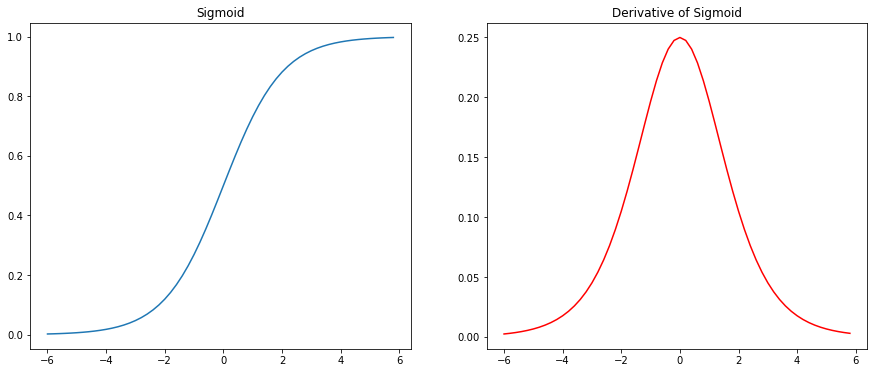

In [37]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-6,6,0.2)
y = 1 / (1 + np.exp(-z))
y_dot = y*(1-y)

fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(z,y)
ax[0].set_title("Sigmoid")
ax[1].plot(z,y_dot,'r')
ax[1].set_title("Derivative of Sigmoid")
fig

### The gradient vanishing/exploding problem
The derivative of sigmlid is no greater than 1/4. Notice when we backpropagate with sigmoid, it is difficult to increase $|w_l|$ while maintaining a good value for the derivative of sigmoid. 
![](http://om1hdizoc.bkt.clouddn.com/17-12-25/32708724.jpg)
So when we make $w$ large, we need to be careful that we're not simultaneously making $\sigma^\prime$ small. Sometimes that will chance to happen. More often, though, it does not happen. And so in the generic case we have vanishing gradients.